<a href="https://colab.research.google.com/github/WaterForTansania/WFT/blob/master/WaterForTansania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd # pandas to read the dataset
import numpy as np 
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
from numpy import nan #To find missing values

Read the target values dataset from the drivendata link.

In [164]:
url = 'https://s3.amazonaws.com/drivendata-prod/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv'
df_values = pd.read_csv(url)

Read the label values dataset from the drivendata link.

In [165]:
url = "https://s3.amazonaws.com/drivendata-prod/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv"
df_labels = pd.read_csv(url)

Label dataset is in this form:

In [166]:
df_labels.head()

id  amount_tsh  ...              waterpoint_type waterpoint_type_group
0  69572      6000.0  ...           communal standpipe    communal standpipe
1   8776         0.0  ...           communal standpipe    communal standpipe
2  34310        25.0  ...  communal standpipe multiple    communal standpipe
3  67743         0.0  ...  communal standpipe multiple    communal standpipe
4  19728         0.0  ...           communal standpipe    communal standpipe

[5 rows x 40 columns]

Description for labels dataset.

In [167]:
df_labels.describe()

id     amount_tsh  ...    population  construction_year
count  59400.000000   59400.000000  ...  59400.000000       59400.000000
mean   37115.131768     317.650385  ...    179.909983        1300.652475
std    21453.128371    2997.574558  ...    471.482176         951.620547
min        0.000000       0.000000  ...      0.000000           0.000000
25%    18519.750000       0.000000  ...      0.000000           0.000000
50%    37061.500000       0.000000  ...     25.000000        1986.000000
75%    55656.500000      20.000000  ...    215.000000        2004.000000
max    74247.000000  350000.000000  ...  30500.000000        2013.000000

[8 rows x 10 columns]

Target values dataset is in the form of :

In [168]:
df_values

id    status_group
0      69572      functional
1       8776      functional
2      34310      functional
3      67743  non functional
4      19728      functional
...      ...             ...
59395  60739      functional
59396  27263      functional
59397  37057      functional
59398  31282      functional
59399  26348      functional

[59400 rows x 2 columns]

Plotting target values with percentages.

Text(0, 0.5, ' ')

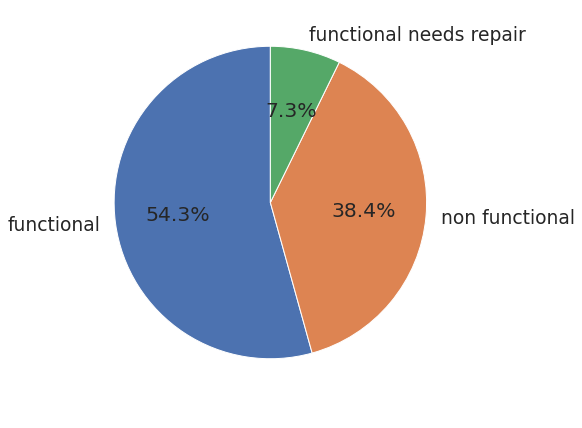

In [169]:
per_plot = df_values['status_group'].value_counts().plot.pie(autopct='%1.1f%%',
        shadow=False, startangle=90 , figsize=(7,13))
per_plot.set_xlabel(" ")
per_plot.set_ylabel(" ")

Merged the label and target dataset to df_merged.

In [170]:
df_merged = df_labels.merge(df_values)
df_region = df_merged.fillna("unknown")
df_region = df_region.loc[:, ['region', 'status_group']]
df_region.head()

region    status_group
0   Iringa      functional
1     Mara      functional
2  Manyara      functional
3   Mtwara  non functional
4   Kagera      functional

Used the merged dataset for plotting

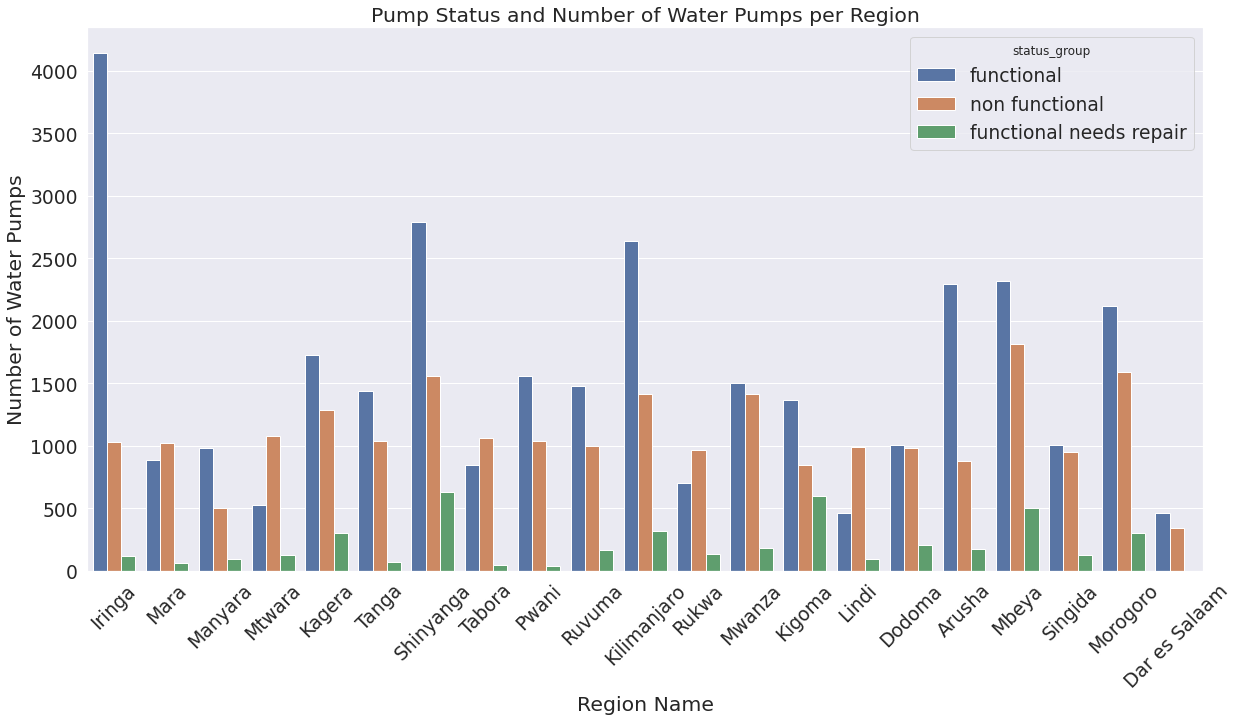

In [171]:
fig = plt.gcf()
fig.set_size_inches(20, 10)

ax = sns.countplot(data=df_region, x='region', hue='status_group')

ax.set(xlabel='Region Name', ylabel='Number of Water Pumps', title='Pump Status and Number of Water Pumps per Region')

sns.set(font_scale=1.7)
plt.xticks(rotation=45);